# TASK 4. Visualisation

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math

from sklearn import datasets
from sklearn.utils.graph_shortest_path import graph_shortest_path

# Isomap Implementation

In [2]:
d = 2
k = 100

In [3]:
def createGraph(data, k):
    size = data.shape[0]
    graph = np.zeros((size, size))
    for i in range(size):
        diff = data - np.tile(data[i], (size, 1))
        diff = np.linalg.norm(diff, axis=1)
        order = np.argsort(diff)
        diff = np.sort(diff)
        dist = diff[1:k + 1] 
        order = order[1:k + 1]
        graph[i, order] = dist
        graph[order, i] = dist
        graph[i, i] = 0
    return graph

In [4]:
def projection(G, q):
    short = graph_shortest_path(G)
    for i in range(G.shape[0]): 
        G[i, :] = short[i]
    
    DSq = G ** 2
    total_mean = np.mean(DSq)
    column_mean = np.mean(DSq, axis=0)
    row_mean = np.mean(DSq, axis=1)
    matr = np.zeros(DSq.shape)
    for i in range(matr.shape[0]):
        for j in range(matr.shape[1]):
            matr[i][j] = -0.5 * (DSq[i][j] - row_mean[i] - column_mean[j] + total_mean)
    eig_val, eig_vec = np.linalg.eig(matr)
    X = np.dot(eig_vec[:, :q], np.sqrt(np.diag(eig_val[:q])))
    return X

In [5]:
def isomap(data, k, d):
    G = createGraph(data, k)
    size = data.shape[0]
    short = graph_shortest_path(G)
    for i in range(size):
        G[i] = short[i]
    Y = projection(G, d)
    return Y

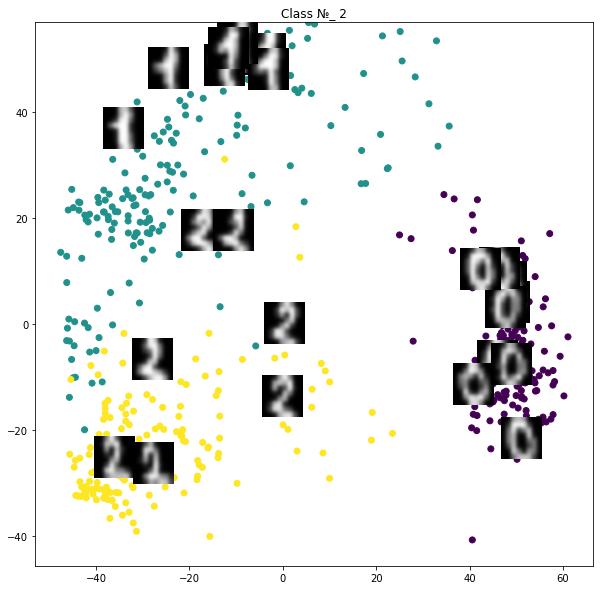

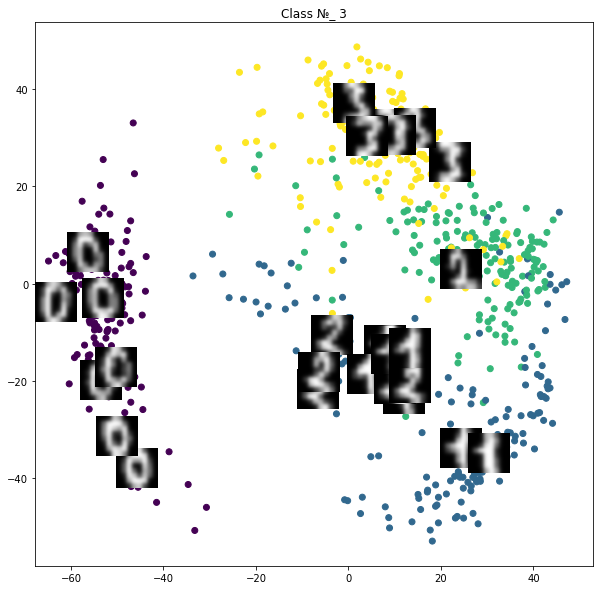

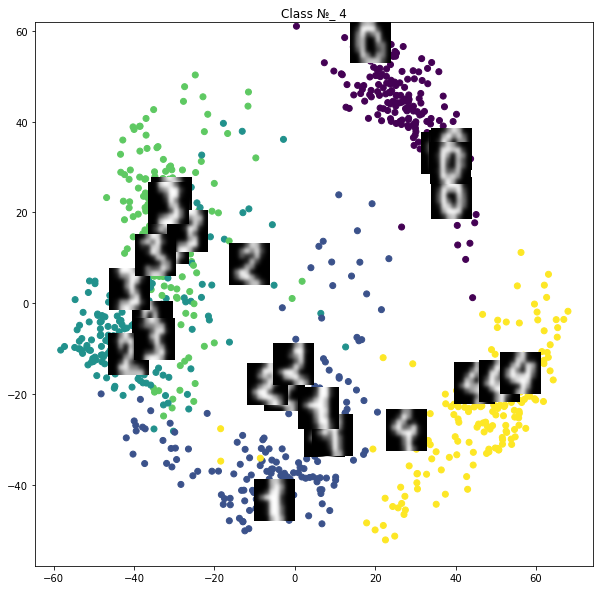

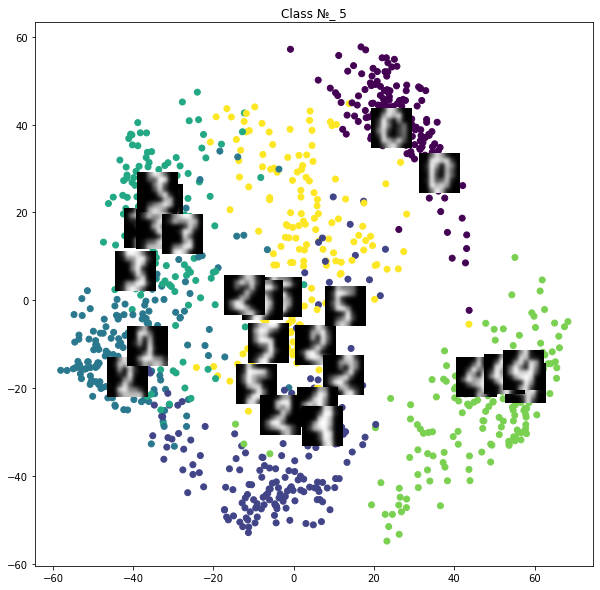

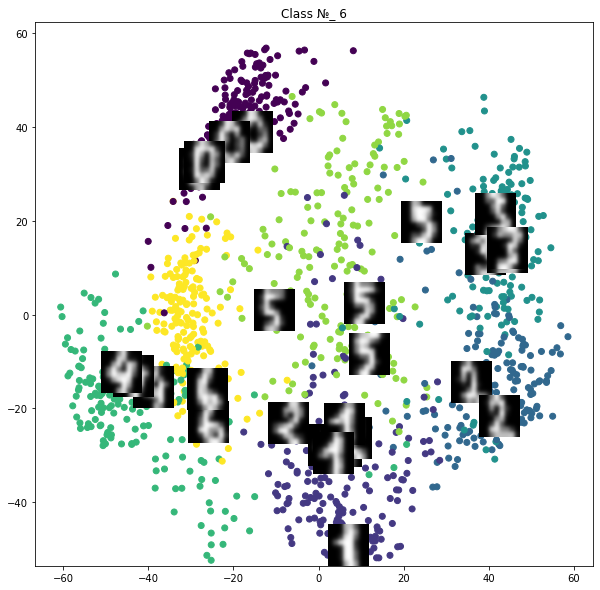

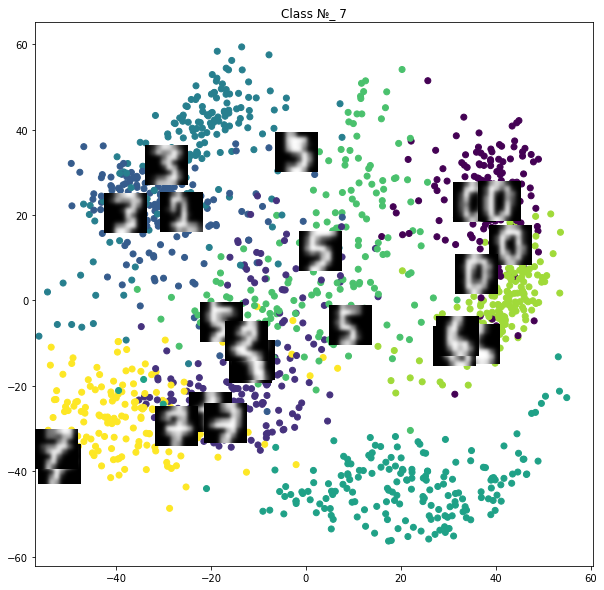

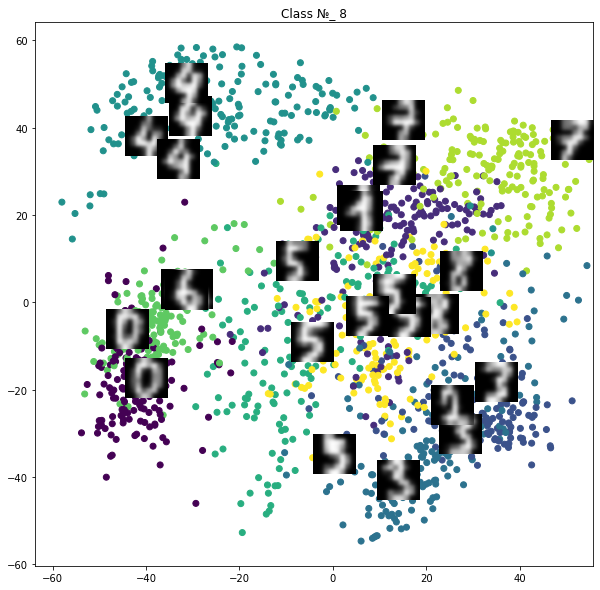

In [6]:
datasets_list = [datasets.load_digits(n_class= i) for i in range(3, 10)]
for j, data in enumerate(datasets_list):
    Y = isomap(data.data, k, d)
    x_size = 0.08 * (max(Y[:, 0]) - min(Y[:, 0]))
    y_size = 0.08 * (max(Y[:, 1]) - min(Y[:, 1]))

    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = fig.add_subplot(111)

    for i in range(40):
        img_num = np.random.randint(0, 40)
        x0 = Y[img_num, 0] - (x_size / 2.0)
        y0 = Y[img_num, 1] - (y_size / 2.0)
        x1 = Y[img_num, 0] + (x_size / 2.0)
        y1 = Y[img_num, 1] + (y_size / 2.0)
        
        img = data.data[img_num, :].reshape(8, 8)
        ax.imshow(img, aspect='auto', cmap='gray', interpolation='gaussian', zorder=100, extent=(x0, x1, y0, y1))
        
    ax.set_title(f"Class №_ {j+2}")
    ax.scatter(Y[:,0], Y[:,1], c= data.target, cmap='viridis')
    plt.show()